<a href="https://colab.research.google.com/github/BartBennett/SimStudent/blob/main/lanchester%20multiple%20runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


#Constants
block_data = [[300,70],[300,70]]   #removed number of blocks and changed name
attrition_factors = [1/2048, 1/512]

blue reinforces - engaged:  670.6  671.2
red reinforces - engaged: 2140.5 2140.8
blue reinforces - engaged:  671.1  671.2
red reinforces - engaged: 2140.7 2140.8
blue reinforces - engaged:  670.8  671.2
red reinforces - force ratio: 2.458  2.5
blue reinforces - engaged:  671.1  671.2
red reinforces - engaged: 2139.9 2140.8
red reinforces - engaged: 2139.7 2140.8
blue reinforces - engaged:  670.4  671.2
Red withdraws - engaged: 1873.1 1873.2


<function matplotlib.pyplot.show(close=None, block=None)>

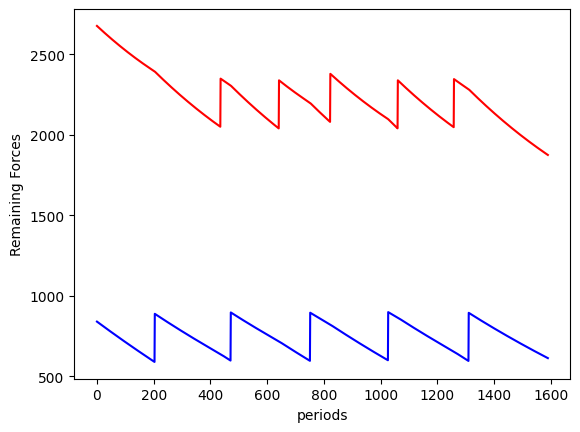

In [ ]:
def attrition(friendly, enemy, factor):
    return max(0, friendly-factor*enemy)

def reinforcements(forces, reinf, blocks, thresholds):
    activated = [0, 0]
    for iside, side in enumerate(sides):
        reinf_details = ''
        if blocks[iside]>0 and np.sum(reinf[iside][max(0, period-block_data[iside][1]):period]) == 0:
            neg_blue = -2*iside + 1
            if FR*neg_blue <= thresholds[iside][0]*neg_blue:
                reinf_details = side + ' reinforces - force ratio: {0:5.3f} {1:4.1f}'.format(FR, thresholds[iside][0])
            if forces[iside] <= thresholds[iside][1]:
                reinf_details = side + ' reinforces - engaged: {0:6.1f} {1:6.1f}'.format(forces[iside], thresholds[iside][1])
        if reinf_details != '':
            blocks[iside] -= 1
            activated[iside] = block_data[iside][0]
            print(reinf_details)
    return blocks, activated

def withdrawn(thresholds):
    withdraw = False
    withdraw_details = ''
    if FR <= thresholds[0][0]:
        withdraw_details = 'Red withdraws - force ratio: {0:5.3f} {1:4.1f}'.format(FR, thresholds[0][0])
        withdraw = True
    if red_units[period] <= thresholds[0][1]:
        withdraw_details = 'Red withdraws - engaged: {0:6.1f} {1:6.1f}'.format(red_units[period], thresholds[0][1])
        withdraw = True 
    if FR >= thresholds[1][0]:
        withdraw_details = 'Blue withdraws - force ratio: {0:5.3f} {1:4.1f}'.format(FR, thresholds[1][0])
        withdraw = True
    if blue_units[period] <= thresholds[1][1]:
        withdraw_details = 'Blue withdraws - engaged: {0:6.1f} {1:6.1f}'.format(blue_units[period], thresholds[1][1])
        withdraw = True
    if withdraw_details != '':
        print(withdraw_details)      
    return withdraw

#arrays
sides = ['red','blue']
red_units = []
red_reinf = []
blue_units = []
blue_reinf = []
periods = []

#Initial conditions
red_units=np.append(red_units, 2676)
blue_units=np.append(blue_units, 839)

reinforce_thresholds = [[2.5, 0.8*red_units[0]],[4.0, 0.8*blue_units[0]]]
blocks = [5, 5]

withdraw_thresholds = [[1.5, 0.7*red_units[0]],[10.0, 0.7*blue_units[0]]]

period = 0
FR = red_units[0]/blue_units[0]
#print(red_units[0], blue_units[0],FR)

while not(withdrawn(withdraw_thresholds)):
    #print('Period ', period, red_units[period], blue_units[period], FR)
    blocks, activated = reinforcements((red_units[period], blue_units[period]), (red_reinf, blue_reinf), blocks, reinforce_thresholds)
    red_reinf = np.append(red_reinf, activated[0])
    blue_reinf = np.append(blue_reinf, activated[1])
    if period >= block_data[0][1]:
        red_units[period] += red_reinf[period-block_data[0][1]]
    if period >= block_data[1][1]:
        blue_units[period] += blue_reinf[period-block_data[1][1]]
    red_units=np.append(red_units, attrition(red_units[period], blue_units[period], attrition_factors[1]))
    blue_units=np.append(blue_units, attrition(blue_units[period], red_units[period], attrition_factors[0]))
    period += 1
    FR = red_units[period]/blue_units[period]

periods = np.arange(0, period)
plt.plot(periods, blue_units[0:period], c='b')
plt.plot(periods, red_units[0:period], c='r')
plt.xlabel("periods")
plt.ylabel("Remaining Forces")
plt.show